In [1]:
# from fastbook import *
from sklearn import datasets
import seaborn as sns
import sklearn
import torch
from torch.utils.data import DataLoader
from torch.nn import functional as F


from mean_classifier import MeanClassifier
from sgd import SGDRegressor, SGDClassifier
import utils

# Mean Classifier

In [2]:
X_train, X_test, y_train, y_test = utils.load_mnist()

In [3]:
clf = MeanClassifier(loss='mae')
clf.fit(X_test, y_test)
clf.score(X_test, y_test)

0.9524043202400208

In [4]:
clf = MeanClassifier(loss='mse')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9661432504653931

# Gradient Descent

<AxesSubplot:>

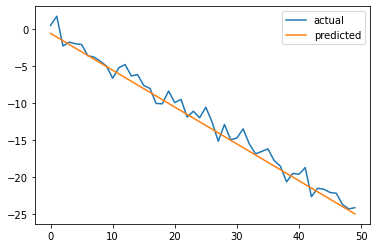

In [9]:
M_TRUE = -0.5
C_TRUE = 0

X = torch.tensor(range(50)).reshape(50, 1).float()
y = ((X * M_TRUE) + C_TRUE + torch.randn(50).reshape((-1, 1))).reshape(50,1)
train_dl = DataLoader(list(zip(X, y)), batch_size=5, shuffle=True)

g = SGDRegressor(epochs=50, loss=F.mse_loss, lr=1e-3, model=torch.nn.Linear(1, 1))
g.fit(train_dl)
sns.lineplot(x=X.reshape(-1), y=y.reshape(-1), label='actual')
sns.lineplot(x=X.reshape(-1), y=g.predict(X).reshape(-1).detach().numpy(), label='predicted')

<AxesSubplot:>

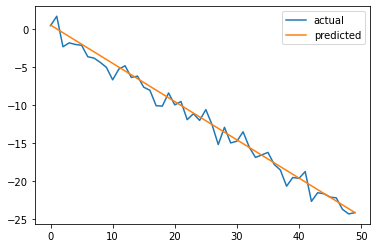

In [11]:
g = SGDRegressor(epochs=50, loss=F.l1_loss, lr=1e-3, model=torch.nn.Linear(1, 1))
g.fit(train_dl)
sns.lineplot(x=X.reshape(-1), y=y.reshape(-1), label='actual')
sns.lineplot(x=X.reshape(-1), y=g.predict(X).reshape(-1).detach().numpy(), label='predicted')

# Classifier

In [12]:
train_dl = DataLoader(list(zip(X_train, y_train)), batch_size=25, shuffle=True)
test_dl = DataLoader(list(zip(X_test, y_test)), batch_size=256)

In [20]:
from learner import Learner
from optimiser import SGD
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

def sigmoid_loss(preds, y_true):
    proba = preds.sigmoid()
    return torch.where(y_true == 1, 1 - proba, proba).mean()
       
l = SGDClassifier(lr=1, epochs=10, model=torch.nn.Linear(28*28, 1))
l.fit(train_dl)
preds = l.predict(X_test)
batch_accuracy(preds, y_test)

tensor(0.9833)

In [23]:
# trying with pytorch's SGD:
clf = Learner(epochs=10, lr=1, optimiser=torch.optim.SGD, loss=sigmoid_loss, model=torch.nn.Linear(28*28, 1))
clf.fit(train_dl)
preds = l.predict(X_test)
batch_accuracy(preds, y_test)

tensor(0.9833)

In [24]:
from fastai.vision.all import DataLoaders, Learner
import fastai


def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

def sigmoid_loss(preds, y_true):
    proba = preds.sigmoid()
    return torch.where(y_true == 1, 1 - proba, proba).mean()


dls = DataLoaders(train_dl, test_dl)
learn = Learner(dls, torch.nn.Linear(28*28,1), opt_func=fastai.optimizer.SGD, loss_func=sigmoid_loss, metrics=batch_accuracy)
learn.fit(10, lr=1)


epoch,train_loss,valid_loss,batch_accuracy,time
0,0.020340,0.024647,0.979882,00:00
1,0.018385,0.024026,0.978901,00:00
2,0.016228,0.019473,0.983808,00:00
3,0.013954,0.018585,0.984789,00:00
4,0.011901,0.019017,0.982826,00:00
5,0.013702,0.018025,0.984789,00:00
6,0.014255,0.017336,0.985280,00:00
7,0.016673,0.016981,0.985770,00:00
8,0.013691,0.017514,0.983317,00:00
9,0.009375,0.016674,0.986261,00:00


# Moving to Neural Networks

In [25]:
import torch
from torch import nn

In [30]:
simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 1),
    nn.Sigmoid()
)

In [31]:
import learner

In [32]:
l = learner.Learner(1, 10, torch.optim.SGD, simple_net, sigmoid_loss)
l.fit(train_dl)

In [34]:
preds = l.predict(X_test)
# batch_accuracy(preds, y_test)

In [37]:
correct = (preds>0.5) == y_test
correct.float().mean()

tensor(0.9843)

In [35]:
preds

tensor([[1.5895e-05],
        [2.6889e-07],
        [1.9342e-04],
        ...,
        [1.0000e+00],
        [1.0000e+00],
        [1.0000e+00]], grad_fn=<SigmoidBackward>)